# Frame the Problem and Look at the Big Picture

## Defining the objective in business terms.
By combining my participation in the Kaggle competition and my Medium articles, I can achieve multiple goals, such as learning and refining your data science skills, building a portfolio, demonstrating my ability to work on real-world problem and increase my reach and followers on Medium.

## How will my solution be used?
It will be used as an example in my portfolio and CV to demonstrate my ability to work with a real-world data science problem. <br>

I'll write an article about the competition, explaining the problem statement and the approach you used to solve it. And by doing so, I will be educating others on that problem and maybe even inspire some of them to tackle a similar problem in their own environment.

I'll open-source my solution, so other data scientist and enthusiasts may use my work as a reference or even build upon it and this could be a way to give back to the community, share my learning and contribute to the collective knowledge.

## What other solutions look like?

* [Comprehensive Data Exploration with Python](https://www.kaggle.com/pmarcelino/house-prices-advanced-regression-techniques/comprehensive-data-exploration-with-python)
    * Understand how variables are distributed and how they interact
    * Apply different transformations before training machine learning models 
    
<br>

* [House Prices EDA](https://www.kaggle.com/dgawlik/house-prices-advanced-regression-techniques/house-prices-eda)
    * Learn to use visualization techniques to study missing data and distributions
    * Includes correlation heatmaps, pairplots, and t-SNE to help inform appropriate inputs to a linear model <br>
    
<br>
    
* [A Study on Regression Applied to the Ames Dataset](https://www.kaggle.com/juliencs/house-prices-advanced-regression-techniques/a-study-on-regression-applied-to-the-ames-dataset)
    * Demonstrate effective tactics for feature engineering
    * Explore linear regression with different regularization methods including ridge, LASSO, and ElasticNet using scikit-learn
    * Regularized Linear Models <br>
    
<br>
    
* [Build a basic linear model](https://www.kaggle.com/apapiu/house-prices-advanced-regression-techniques/regularized-linear-models)
    * Try more advanced algorithms including XGBoost and neural nets using Keras <br>

## Framing the problem

**This Kaggle competition is supervised, offline, regression learning problem.**

The problem is supervised because the dataset includes both the input features (such as the size of the property, number of bedrooms, etc.) and the output label (the sale price of the home). The goal of the competition is to train a model on this labeled data and use it to make predictions on new, unseen data.

It's an offline problem, because all the data is available at the time of training and the model's performance is evaluated on a fixed test set. The model doesn't have to learn or adapt during the time of prediction.

Additionally, the problem can be considered as a regression problem. The goal is to predict a continuous value (sale price of a home) given a set of input features, rather than predicting a discrete class label.

## Performance meassure
My Kaggle submission will be evaluated on Root-Mean-Squared-Error (RMSE) between the logarithm of the predicted value and the logarithm of the observed sales price. (Taking logs means that errors in predicting expensive houses and cheap houses will affect the result equally.)

## Alignment of the performance measure with my business objective?

the performance measure is a direct and relevant evaluation of the model's ability to predict the sale price of homes, which aligns with the business objective of building a model that can be used for this purpose, in turn, achieving my goals of learning, building your portfolio and increasing your reach on Medium.

## What would be the minimum performance needed to reach the business objective?

The minimum performance needed to reach the business objective would be <0.14508 (my last score when attempted the competition a year ago) to build the confidence needed to write an article about my experience, the solution you implemented, and the insights obtained.

A model that has an RMSE of less than 0.1 is considered to have a good performance.

## Comparable problems, and reusing other experiences and tools
problems that are comparable involve predicting a continuous value (such as a price, quantity, or measurement) based on a set of input features. These problems are generally considered to be regression problems and can be tackled using similar techniques and approaches.

One example of a comparable problem is predicting the price of a stock or other financial asset based on historical data and other factors. This requires a similar process of data exploration, feature engineering, and model selection and fine-tuning, as you would use for the "House Prices" competition.

Another example of a comparable problem is predicting the energy consumption of a building based on historical data of energy usage and other factors such as temperature, occupancy and time of day. This problem requires similar data exploration, feature engineering, model selection and fine-tuning

I'll be reusing my experience gained in the second chapter of the book "Hands-On Machine Learning with Scikit-Learn and TensorFlow by Aurélien Géron," is a real-world example of a problem similar to the competition.

## Human expertise available

The Kaggle community, Books, and Tutorials.

## How would I solve the problem manually?
I'd divide the dataset into two groups, one group for houses with the highest prices, and another group for houses with the lowest prices. Perform clustering on both groups to identify patterns, trends, and relationships between the features and the sale price and use that understanding to predict the price of new houses

## List of assumptions made so far

I'm assuming that since the list of features is huge in comparison to the dataset, selecting only the most relevant features to train the model would improve performance

I assume that there is a square root relationship between the input features and the sale price of homes. By assuming that the relationship is square root instead of linear, I might use models that can handle non-linear relationships, such as decision trees, random forests, gradient boosting or neural networks.

## Verifying assumptions
It is worth noting that it is important to verify the assumption by visualizing the data, using statistical tests or by using diagnostic plots, in order to confirm that the assumption is true and that the square root transformation improves the performance of the model. Once the assumption is confirmed, then it's possible to proceed with the model selection and fine-tuning.

It's also important to mention that this assumption is not always the case, other relationships like logarithmic, exponential or polynomial could exist that might be more appropriate. Therefore, it's important to explore different assumptions and transformations to find the best fit for the data and to achieve the best performance.

# Getting the Data

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/house-prices-advanced-regression-techniques/sample_submission.csv
/kaggle/input/house-prices-advanced-regression-techniques/data_description.txt
/kaggle/input/house-prices-advanced-regression-techniques/train.csv
/kaggle/input/house-prices-advanced-regression-techniques/test.csv


## Converting the data to a format that is easy to manipulate (without changing the data itself)

In [2]:
import pandas as pd
train_set = pd.read_csv("/kaggle/input/house-prices-advanced-regression-techniques/train.csv")

## Check the size and type of data (time series, sample, geographical, etc.).

In [3]:
train_set.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


Each row row represents a house

In [4]:
train_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

There are 80 attributes and probably the ID column is redundant here.


There are 1460 instances in the dataset, which means that it is fairly small by machine learning standards, but it's perfect for my goal.<br> 
I notice that there are many attributes with the majority of its features missing. I will need to take care of this later.


There is a mix of numerical and object types. To find out what categories exist and how many houses belong to each category I'll use the value_counts() method:

In [5]:
#iterate over all columns
for column in train_set.columns:
    #check if the dtype of the column is object
    if train_set[column].dtype == 'object':
        #print the value_counts of the column
        print(train_set[column].value_counts())
        print("\n")

RL         1151
RM          218
FV           65
RH           16
C (all)      10
Name: MSZoning, dtype: int64


Pave    1454
Grvl       6
Name: Street, dtype: int64


Grvl    50
Pave    41
Name: Alley, dtype: int64


Reg    925
IR1    484
IR2     41
IR3     10
Name: LotShape, dtype: int64


Lvl    1311
Bnk      63
HLS      50
Low      36
Name: LandContour, dtype: int64


AllPub    1459
NoSeWa       1
Name: Utilities, dtype: int64


Inside     1052
Corner      263
CulDSac      94
FR2          47
FR3           4
Name: LotConfig, dtype: int64


Gtl    1382
Mod      65
Sev      13
Name: LandSlope, dtype: int64


NAmes      225
CollgCr    150
OldTown    113
Edwards    100
Somerst     86
Gilbert     79
NridgHt     77
Sawyer      74
NWAmes      73
SawyerW     59
BrkSide     58
Crawfor     51
Mitchel     49
NoRidge     41
Timber      38
IDOTRR      37
ClearCr     28
StoneBr     25
SWISU       25
MeadowV     17
Blmngtn     17
BrDale      16
Veenker     11
NPkVill      9
Blueste      2
Name: Neig

In [6]:
train_set.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


25% of the houses have a SalePrice lower than 129,975 while 50% are lower than 163,000 and 75% are lower than 214,000

*I wondered why the MSSubClass attribute shows up here, when the describe() method shows a summary of just the numerical attributes. After checking the data_description.txt file, I noticed that the MSSubClass attribute, which is categorical, is encoded as numerical. Maybe it is not the only one, I'll have to take care of that later.*

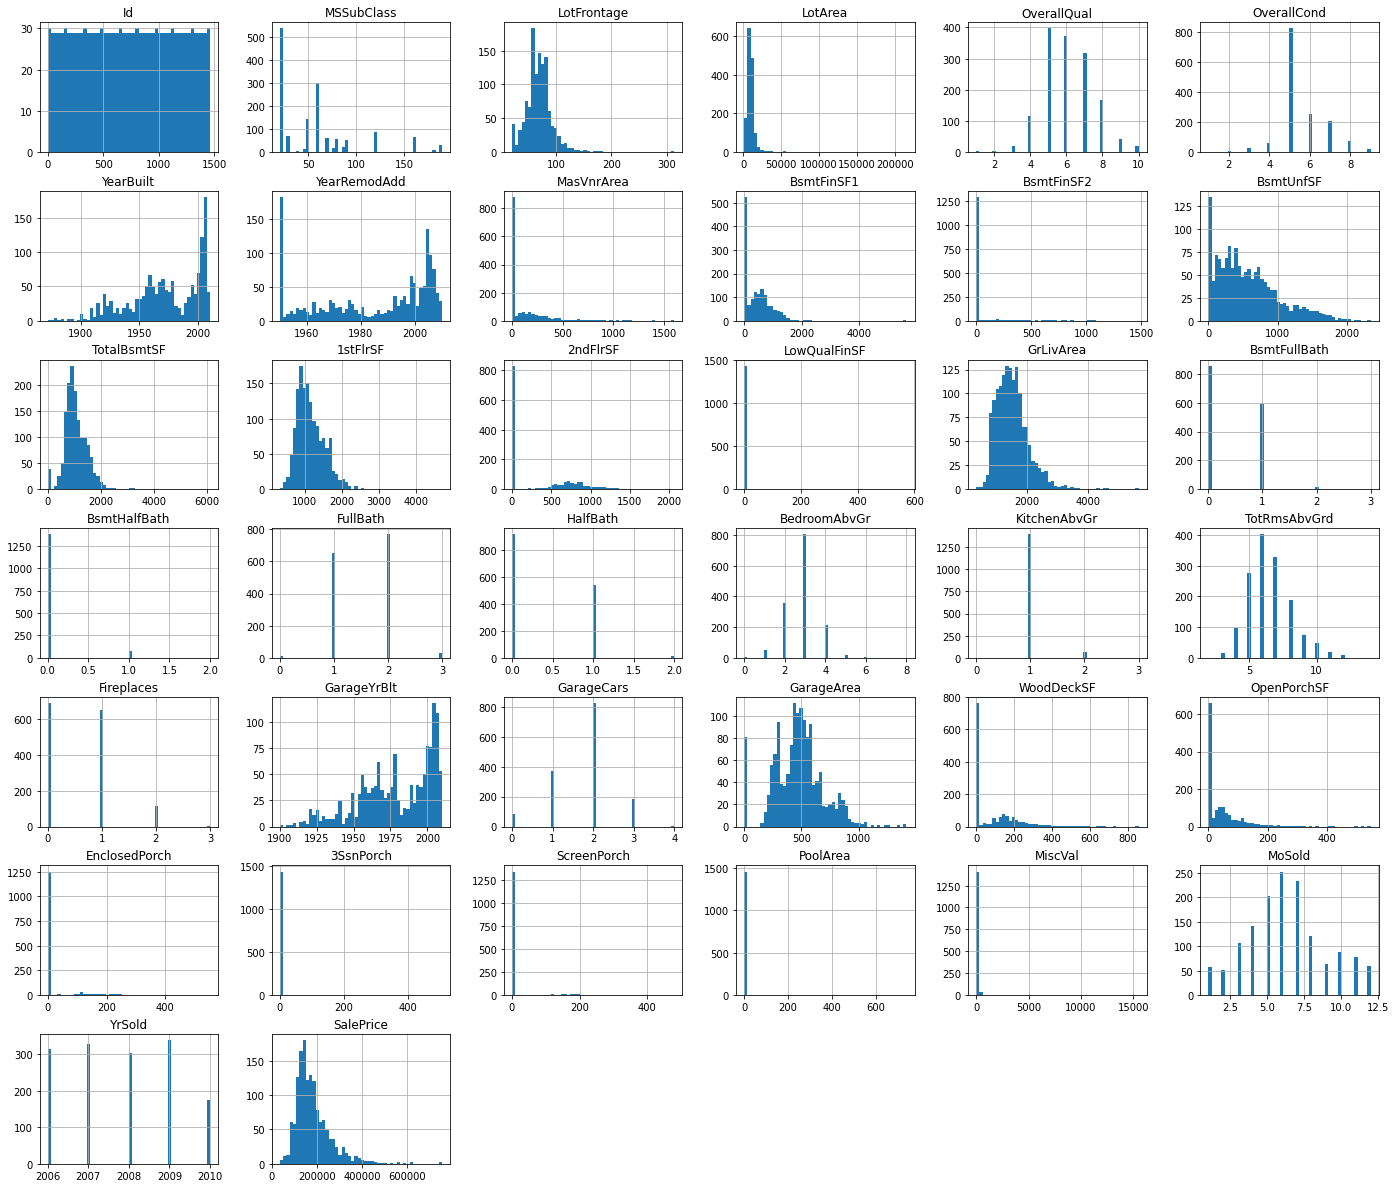

In [7]:
import matplotlib.pyplot as plt

train_set.hist(bins=50, figsize=(24, 21))
plt.show()

Looking at these histograms, I notice a few things: 
 
* The YearRemodAdd attribute have a floor constraint at around 1945. My machine learning algorithms may learn that the Remodel date is never bellow 1945. I might have to remove that attribute or transform it.

* These attributes have very different scales. We will discuss this later when we explore feature scaling. 

* Finally, many histograms are skewed. This may make it a bit harder for some machine learning algorithms to detect patterns. Later, I’ll try transforming these attributes to have more symmetrical and bell-shaped distributions.

# Exploring and Visualizing the Data to Gain Insights
I have only taken a quick glance at the data to get a general understanding of the kind of data you are manipulating. Now the goal is to go into a little more depth.

## Creating a copy of the data for exploration
Since the training set is quite small, I will just work directly on the full set. 

Since I’m going to experiment with various transformations of the full training set, I should make a copy of the original so I can revert to it afterwards:

In [8]:
housing = train_set.copy()

## Studying each attribute and its characteristics
### Name 
### Type (categorical, int/float, bounded/unbounded, text, structured, etc.) 
### % of missing values 
### Noisiness and type of noise (stochastic, outliers, rounding errors, etc.) 
### Usefulness for the task 
### Type of distribution (Gaussian, uniform, logarithmic, etc.)

In [9]:
attributes = housing.columns.tolist()

In [10]:
housing.shape

(1460, 81)

In [11]:
print(attributes)

['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond', 'PavedDrive', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'PoolQC'

### Name

In [12]:
def get_name_description(attribute_name):
    with open("/kaggle/input/house-prices-advanced-regression-techniques/data_description.txt", 'r') as f:
        lines = f.readlines()
        for i, line in enumerate(lines):
            if line.startswith(attribute_name):
                return line.strip()

In [13]:
get_name_description("MSSubClass")

'MSSubClass: Identifies the type of dwelling involved in the sale.'

### Type

In [14]:
housing["MSSubClass"].dtype

dtype('int64')

In [15]:
print("Minimum value:", housing["MSSubClass"].min())
print("Maximum value:", housing["MSSubClass"].max())

Minimum value: 20
Maximum value: 190


In [16]:
def get_attribute_description(attribute_name):
    
    for i, s in enumerate(attributes):
        if s == attribute_name:
            next_attribute = attributes[i + 1]
    
    with open("/kaggle/input/house-prices-advanced-regression-techniques/data_description.txt", 'r') as f:
        lines = f.readlines()
    for i, line in enumerate(lines):
        if attribute_name != "SaleCondition":
            if line.startswith(attribute_name):
                start = i
            if line.startswith(next_attribute):
                end = i-1
                return ''.join(lines[start:end])
        else:
            if line.startswith(attribute_name):
                start = i
                return ''.join(lines[start:])

In [17]:
print(get_attribute_description("MSSubClass"))

MSSubClass: Identifies the type of dwelling involved in the sale.	

        20	1-STORY 1946 & NEWER ALL STYLES
        30	1-STORY 1945 & OLDER
        40	1-STORY W/FINISHED ATTIC ALL AGES
        45	1-1/2 STORY - UNFINISHED ALL AGES
        50	1-1/2 STORY FINISHED ALL AGES
        60	2-STORY 1946 & NEWER
        70	2-STORY 1945 & OLDER
        75	2-1/2 STORY ALL AGES
        80	SPLIT OR MULTI-LEVEL
        85	SPLIT FOYER
        90	DUPLEX - ALL STYLES AND AGES
       120	1-STORY PUD (Planned Unit Development) - 1946 & NEWER
       150	1-1/2 STORY PUD - ALL AGES
       160	2-STORY PUD - 1946 & NEWER
       180	PUD - MULTILEVEL - INCL SPLIT LEV/FOYER
       190	2 FAMILY CONVERSION - ALL STYLES AND AGES



In [18]:
from scipy import stats
import numpy as np
from scipy.stats import chisquare

def study_distribution(attribute):
    
    # Check for normality using the Shapiro-Wilk test
    if housing[attribute].dtype in ['int64', 'float64']:        
        shapiro_results = stats.shapiro(housing[attribute].dropna())
        if shapiro_results[1] > 0.05:
            print("The data is likely Gaussian distributed.")
        else:
            print("The data is not Gaussian distributed.")
    
    # Check for uniform distribution using the Chi-Squared test
    value_counts = housing[attribute].value_counts()
    observed = value_counts.values
    chi2, p_value = chisquare(observed)
    if p_value > 0.05:
        print("The data is likely Uniform.")
    else:
        print("The data is not Uniform.") 

    # Check for logarithmic distribution using the Shapiro-Wilk test
    if housing[attribute].dtype in ['int64', 'float64']:        
        logged_attribute = np.log(housing[attribute])
        shapiro_results = stats.shapiro(logged_attribute.dropna())
        if shapiro_results[1] > 0.05:
            print("The data is likely Logarithmic distributed.")
        else:
            print("The data is not Logarithmic distributed.")

In [19]:
import numpy as np

def study_attributes(attribute):
    print(get_attribute_description(attribute))

    print("Type: ", housing[attribute].dtype)
    print("Percentage of missing values: ", round(housing[attribute].isnull().mean()*100, 2), "%")

    # Check for stochastic noise
    if housing[attribute].dtype in ['int64', 'float64']:        
        mean = housing[attribute].mean()
        std = housing[attribute].std()
        cv = (std / mean)
        print("Noisiness (coefficient of variation): ", cv)
    else:
        unique_values = housing[attribute].nunique()
        total_values = len(housing[attribute])
        stochastic_noise = unique_values / total_values    
        print("Noisiness (unique_values/total_values): ", stochastic_noise)
    
    # Check for outliers
    if housing[attribute].dtype in ['int64', 'float64']:        
        data = housing[attribute]
        mean = np.mean(data)
        std_dev = np.std(data)
        outliers = [x for x in data if x < mean - 3*std_dev or x > mean + 3*std_dev]
        print("Number of outliers: ", len(outliers))
        
    # Check for rounding errors
    if housing[attribute].dtype in ['int64', 'float64']:
        rounded = housing[attribute].round()
        diff = housing[attribute] - rounded
        rounding_errors = diff[diff != 0]
        rounding_error_rate = len(rounding_errors) / len(housing)
        print("Rounding Error Rate: ", rounding_error_rate)
    else:
        print("\nValue_counts:") 
        print(housing[attribute].value_counts())
        
    study_distribution(attribute)

**Usefull for the task**

In [20]:
for col in housing.columns:
    try:
        study_attributes(col)
        print("\n")
        print("\n")
    except UnboundLocalError:
        continue
    except IndexError:
        continue

MSSubClass: Identifies the type of dwelling involved in the sale.	

        20	1-STORY 1946 & NEWER ALL STYLES
        30	1-STORY 1945 & OLDER
        40	1-STORY W/FINISHED ATTIC ALL AGES
        45	1-1/2 STORY - UNFINISHED ALL AGES
        50	1-1/2 STORY FINISHED ALL AGES
        60	2-STORY 1946 & NEWER
        70	2-STORY 1945 & OLDER
        75	2-1/2 STORY ALL AGES
        80	SPLIT OR MULTI-LEVEL
        85	SPLIT FOYER
        90	DUPLEX - ALL STYLES AND AGES
       120	1-STORY PUD (Planned Unit Development) - 1946 & NEWER
       150	1-1/2 STORY PUD - ALL AGES
       160	2-STORY PUD - 1946 & NEWER
       180	PUD - MULTILEVEL - INCL SPLIT LEV/FOYER
       190	2 FAMILY CONVERSION - ALL STYLES AND AGES

Type:  int64
Percentage of missing values:  0.0 %
Noisiness (coefficient of variation):  0.7434553226310728
Number of outliers:  30
Rounding Error Rate:  0.0
The data is not Gaussian distributed.
The data is not Uniform.
The data is not Logarithmic distributed.




MSZoning: Identifies th

/opt/conda/lib/python3.7/site-packages/pandas/core/arraylike.py:364: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


The data is not Gaussian distributed.
The data is not Uniform.
The data is likely Logarithmic distributed.




None
Type:  int64
Percentage of missing values:  0.0 %
Noisiness (coefficient of variation):  1.3134394568794658
Number of outliers:  12
Rounding Error Rate:  0.0
The data is not Gaussian distributed.
The data is not Uniform.
The data is likely Logarithmic distributed.




None
Type:  int64
Percentage of missing values:  0.0 %
Noisiness (coefficient of variation):  0.2845964024971502
Number of outliers:  14
Rounding Error Rate:  0.0
The data is not Gaussian distributed.
The data is not Uniform.
The data is likely Logarithmic distributed.




KitchenQual: Kitchen quality

       Ex	Excellent
       Gd	Good
       TA	Typical/Average
       Fa	Fair
       Po	Poor

Type:  object
Percentage of missing values:  0.0 %
Noisiness (unique_values/total_values):  0.0027397260273972603

Value_counts:
TA    735
Gd    586
Ex    100
Fa     39
Name: KitchenQual, dtype: int64
The data is not Un

In [21]:
# change of plans, this is getting too complex, limit myself to just the points that were covered in the book, 
# if they are not applicable don't do them, and just do the extra if it is required for finishing the objective

After studying the attributes I found that:
* Id column is not usefull for the task
* Maybe the Street attribute is not usefull since just 6 houses out of 1460 are not paved
* The percentage of missing values for the Alley attribute is 93.77 % so it's likely an useless attribute
* The LotShape attribute, which categorizes the general shape of property is proabbly not usefull, is not a thing I personally look at
* The Utilities is uselss since all houses have all public Utilities except for one
* The LandSlope attribute which categorizes the slope of property sounds very similar to the LandContour attribute which categorizes the flatness of the property, maybe keeping just one of those is usefull.
    * The same goes for OverallCond and OverallQual
* The Roof material is an attribute that I think won't be that usefull, first of all is not something I personally look at, and also just 25 are not Clay or Tile
* The MasVnrType and MasVnrArea have more than half of its data missing, maybe these attributes aren't that usefull the time figuring out how to deal with the missing values
* The ExterQual attribute which evaluates the quality of the material on the exterior and the ExterCond which Evaluates the present condition of the material on the exterior sound very similar to me, and the ExterCond has most houses classified as Average/Typical, so that is not very insightful
* BsmtQual probably captures the relevant information about the basement, so mayble BsmtCond is not very useful
* Probably TotalBsmtSF captures enough relevant information about the square feet of basement area and we can drop the other SF basement attributes
* Electrical: Electrical system is likely not a usefull attribute, mostly are Standard Circuit Breakers & Romex
* similarly 1stFlrSF and 2ndFlrSF are not that usefull if i have the total SF

1. For supervised learning tasks, identify the target attribute(s). 
1. Visualize the data. H 4
1. Study the correlations between attributes. L 0.5
1. Study how you would solve the problem manually. H 4
1. Identify the promising transformations you may want to apply. L 1.5
1. Document what you have learned. M 2
13 hours

1. Clean the data: 
* Fix or remove outliers (optional). 
* Fill in missing values (e.g., with zero, mean, median…) or drop their rows (or columns). 
2. Perform feature selection (optional): 
* Drop the attributes that provide no useful information for the task. 
3. Perform feature engineering, where appropriate: 
* Discretize continuous features. 
* Decompose features (e.g., categorical, date/time, etc.). 
* Add promising transformations of features (e.g., log(x), sqrt(x), x2, etc.). 
* Aggregate features into promising new features.
4. Perform feature scaling: 
* Standardize or normalize features.